In [37]:
import pandas as pd 
import json 
import utils 
from collections import defaultdict
import glob
import os

In [38]:
def calculate_accuracy(results_dir):
    results = defaultdict(list)
    for file_path in glob.glob(results_dir):
        data = pd.DataFrame(utils.load_json(file_path))
        for i, row in data.iterrows():
            results[row['name']].append(row['pass'])
    
    perf = {name: sum(result)/len(result) for name, result in results.items()}
    return perf, results


Conversation

In [41]:
performance,_ = calculate_accuracy('./outputs/demo_aws_sonnet35_v2_nretry0_nlayers8_2024-12-11*')

In [43]:
file_path = './outputs/demo_aws_sonnet35_v2_nretry0_nlayers8_2024-12-11_0.json'
data = pd.DataFrame(utils.load_json(file_path))
# for i, row in data.iterrows():
#     print(f'The problem {row['name']} test results : {row['pass']}')
#     # print(f'The problem {row['name']} test results : {row['stderr']}')
#     print('-' * 20)

name = 'test_axist_storefwd_fifo_3'
steps = data[data['name'] == name]['conversation'].values[0].split('\n [NEW STEP]\n')
for step in steps:
    print(step)
    print('-' *30)

Problem description:
    Create a SystemVerilog module that acts as a store-and-forward ready/valid FIFO for an AXI4 Stream protocol. The FIFO should support a parameterized number of entries (Depth) and a parameterized type for the input and output data (AxiStreamType). If Depth is 0, the FIFO should be bypassed and output data = input data. Depth of 1 is not supported. If there is not enough free in the FIFO to store an incoming frame, then the frame must be dropped, this is determined by the Maximum Transfer Unit (MTU) size, based on a parameter EntriesMTU.
-- In the AXI Stream protocol, a packet (or frame) is valid from the first data phit (following reset=1 or a previous tvalid=1=tlast) until the last data phit (tvalid=1=tlast). When transmitting a frame, this module cannot re-arbitrate until the last data phit (tvalid=1=tlast) is transferred on the input.
-- The module has inputs clock and reset, where reset is a synchronous reset.
-- The module name should be: dut
-- Module para

Performance Compariosn

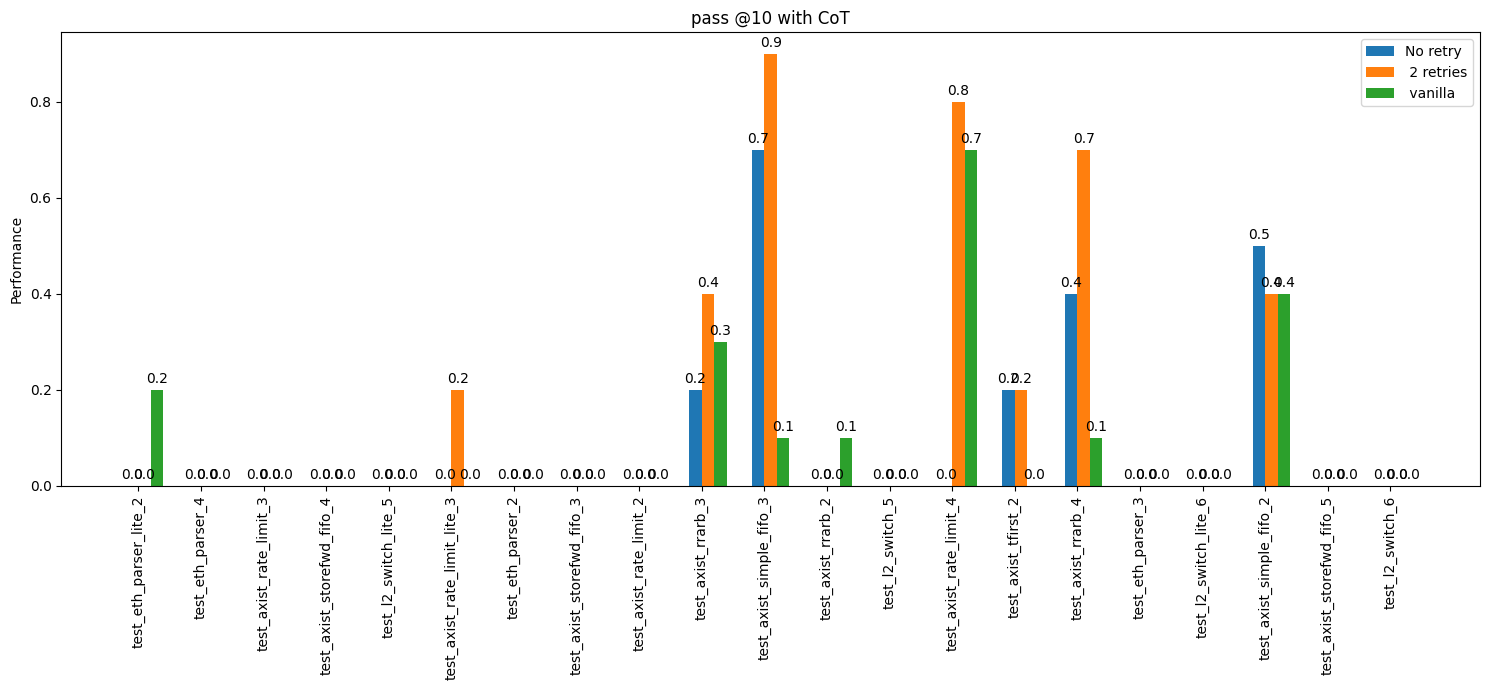

In [135]:
import matplotlib.pyplot as plt


performance,_ = calculate_accuracy('./outputs/demo_google_claude_3.5_sonnet_v2_nretry0_nlayers8_2024-12-06*')
performance_retry2,_ = calculate_accuracy('./outputs/demo_google_claude_3.5_sonnet_v2_nretry2_nlayers8_2024-12-04*')
concat_results = {}
for name, p in performance.items():
    concat_results[name] = (p, performance_retry2[name],performance_vanilla_sonnet_v2[name] )
# Extract keys and values for plotting
categories = list(concat_results.keys())


# Separate the tuple values into two separate lists for plotting
values1 = [val[0] for val in concat_results.values()]
values2 = [val[1] for val in concat_results.values()]
values3 = [val[2] for val in concat_results.values()]

# Plotting the bar plot
x = range(len(categories))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, values1, width, label='No retry')
rects2 = ax.bar([p + width for p in x], values2, width, label=' 2 retries')
rects3 = ax.bar([p + 2*width for p in x], values3, width, label=' vanilla')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('pass @10 with CoT')
ax.set_xticks([p + width / 2 for p in x])
# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 4 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
# Show plot
plt.tight_layout()
plt.show()

Chip Eval

In [27]:
performance, results = calculate_accuracy('./outputs/ChipEval_aws_sonnet35_v2_nretry20_nlayers0_*')

In [28]:
pass_i =[]
n_exp = 10
for i in range(n_exp):
    pass_i.append(np.sum([p[i] for name, p in results.items()])/len(results))
    print(f'Performnace for batch {i} is {pass_i[-1]}')
    
print(f'Mean performance with {len(results)} experiments is {np.mean(pass_i)}')
    
    

Performnace for batch 0 is 0.42105263157894735
Performnace for batch 1 is 0.5789473684210527
Performnace for batch 2 is 0.47368421052631576
Performnace for batch 3 is 0.42105263157894735
Performnace for batch 4 is 0.5526315789473685
Performnace for batch 5 is 0.3684210526315789
Performnace for batch 6 is 0.4473684210526316
Performnace for batch 7 is 0.5526315789473685
Performnace for batch 8 is 0.47368421052631576
Performnace for batch 9 is 0.4473684210526316
Mean performance with 38 experiments is 0.4736842105263158
